# Requiared Library

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Algorithm Flow
1. Convert Image To black and white image
2. Detect a Group of White pixels
3. Crop the image based on Region Of Interest that created from step 2
4. Template Matching image to group the image based on numbers and words
5. Train and create CNN model using the dataset from step 4
6. Use the CNN model to read words and number on the plate

# Pre-Processing Image (Experiment)

(500, 1000, 3)
76 30


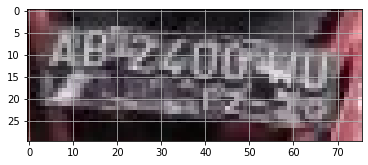

In [10]:
img = cv2.imread("assets/DataTrain/DataTrain7.png")
 
# * Resizing The Image to 600x600 pixel
resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
print(resize.shape)

print(len(img[0]), len(img),)
# * Converting color channel order from Blue Green Red to Red Green Blue 
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.grid(True)

# ? enable this code to remove plot ticks
#plt.xticks([]), plt.yticks([])

In [11]:
# x1, y1 = 100, 100  # top-left coordinate
# x2, y2 = 300, 300 
# plt.imshow(im_rgb[y1:y2][x1:x2])

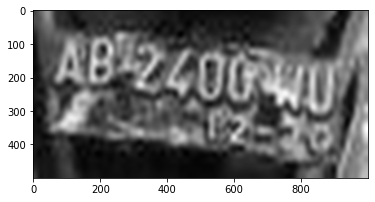

In [12]:

"""
 * Converting 3 Color Channel to 1 Channel of Grayscale
"""
gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

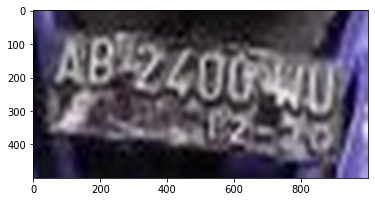

In [13]:
kernel = np.array([
    [0, -1, 0], 
    [-1, 5, -1], 
    [0, -1, 0]])  # Kernel sharpening
sharpened_image = cv2.filter2D(resize, -1, kernel)

plt.imshow(sharpened_image, cmap="gray")

(<matplotlib.image.AxesImage at 0x25cf4590dc0>, None)

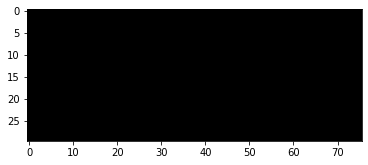

In [14]:
lower_yellow = np.array([0, 100, 100])
upper_yellow = np.array([50, 255, 255])
yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

plt.imshow(yellow_mask, cmap='binary_r'), plt.grid(False)

(<matplotlib.image.AxesImage at 0x25cf5bd0d60>, None)

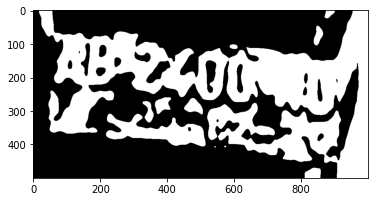

In [15]:


#thresh = ''
if cv2.countNonZero(yellow_mask) > 195:
    """
    * Converting Grayscale image to Black and White image using Thresh otsu technique
    """
    ret, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
else:
    ret, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)

plt.imshow(thresh, cmap='binary_r'), plt.grid(False)

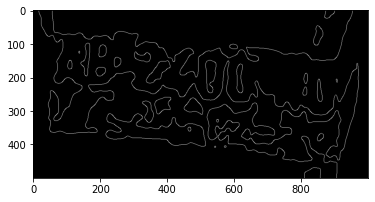

In [16]:
canny = cannyEdges = cv2.Canny(thresh, 0, 100)
plt.imshow(canny, cmap='binary_r')

image 4 = [x : 327, y : 271, w : 33, h : 64, different of w and h : 31]
image 8 = [x : 838, y : 47, w : 28, h : 58, different of w and h : 30]


(<matplotlib.image.AxesImage at 0x25cf5f97250>, None)

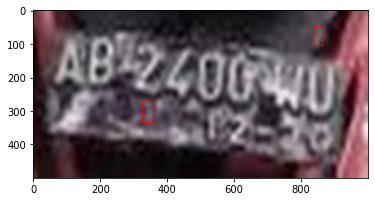

In [17]:

"""
    TODO : Still need more adjustment for detecting white Region

    * finContours() : A method to detect a group of white pixels in thresholded image
    - cv2.RETR_EXTERNAL : To prevent detecting child contours that can create rekursif contours 
    - cv2.CHAIN_APPROX_SIMPLE : one of contours finding technique that use approximation method

    * boundingRect() : A method to get x and y Axis and height and width of the ROI
    * rectangle() : A method to draw the ROI border
"""

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = resize.copy()

for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    if h > w and (h - w) > 20:
        print(f"image {i} = [x : {x}, y : {y}, w : {w}, h : {h}, different of w and h : {h-w}]")
        cv2.rectangle(detected_contours,(x,y),(x+w,y+h),(0,0,255), 2)

im_rgb = cv2.cvtColor(detected_contours, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)

# Main Algorithm

In [18]:

def preprocessing(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    

    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w and (h - w) > 15:
            cv2.rectangle(resize,(x,y),(x+w,y+h),(0,0,255), 2)
    
    return resize

def preprocessing2(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    

    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    cropped = []
    
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w and (h - w) > 15:
            cropped.append(thresh[y:y+h, x:x+w])
    
    return cropped

In [19]:
directory = "assets/DataTrain/"
listOfImages = os.listdir(directory)
len(listOfImages)

collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    collections.append(preprocessing(img))



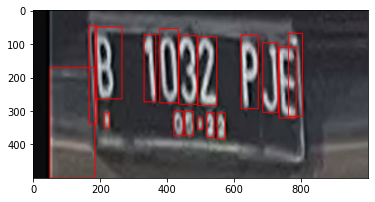

In [20]:
view =  cv2.cvtColor(collections[11], cv2.COLOR_BGR2RGB)
plt.imshow(view)

In [21]:
c_collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    numChar = preprocessing2(img)
    # c_collections.append(numChar)
    for j in numChar:
        print(j)
        c_collections.append(j)


[[  0   0   0 255 255   0   0   0   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0   0]
 [  0 255 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255   0   0   0]
 [255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255 255 255 255]
 [  0 255 255

In [22]:
# !this code for analysis purpose 

view2 =  cv2.cvtColor(c_collections[8], cv2.COLOR_BGR2RGB)
view2 = cv2.cvtColor(c_collections[8], cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(view2,0,255,cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)
plt.imshow(threshed, cmap ="binary_r")

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


6668


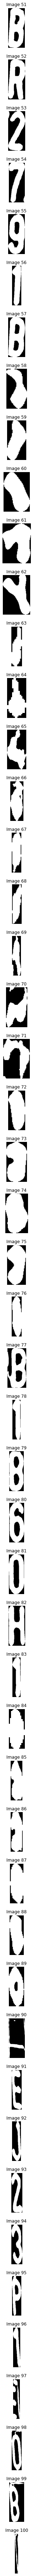

In [23]:

fig, axes = plt.subplots(nrows=50, ncols=1, figsize=(60, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(c_collections))

for i in range(50,100):
    # Plot the image
    # gray_conv = cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2GRAY)
    # _, threshed = cv2.threshold(gray_conv,0,255, cv2.THRESH_OTSU)
    # canny = cannyEdges = cv2.Canny(threshed, 100, 50)
    axes[-(50-i)].imshow(cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2RGB))
    axes[-(50-i)].axis('off')
    axes[-(50-i)].set_title(f'Image {i+1}')

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()

# Pretrained Model

In [ ]:
# # Tensoflow library
# import tensorflow as tf

In [ ]:
# digits = tf.keras.datasets.mnist

# (xtrain, ytrain), (xtest, ytest) = digits.load_data()
# len(ytrain)



60000

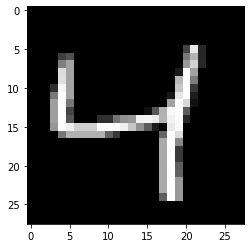

In [ ]:
# plt.imshow(xtrain[2], cmap ='binary_r')


60000

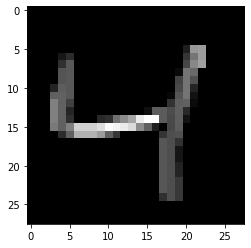

In [ ]:
# # Normalize -> range the pixel between 0 to 1

# xtrain = tf.keras.utils.normalize(xtrain, axis = 1)
# xtest = tf.keras.utils.normalize(xtest, axis=1)
# plt.imshow(xtrain[2], cmap="binary_r")


# len(ytrain)


In [ ]:
# #buildinf CNN model

# model = tf.keras.models.Sequential()

# #converto to 1 dimension
# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# model.compile(optimizer = 'adam',
#             loss ='sparse_categorical_crossentropy',
#             metrics =['accuracy'])

# model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2639 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9946: 0s - loss: 0.015
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/

In [ ]:
# model.save('digits_model')

INFO:tensorflow:Assets written to: digits_model\assets


In [ ]:
# use_model = tf.keras.models.load_model('digits_model')

In [ ]:
# resized = cv2.resize(c_collections[16],[28,28]).reshape(1,784)
# xtest = tf.keras.utils.normalize(resized, axis=1)

# predict = use_model.predict([resized])
# print(np.argmax(predict[0]))

2


(784,)


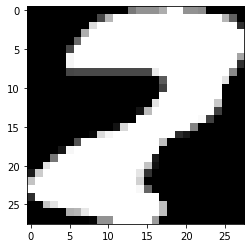

In [ ]:
# plt.imshow(cv2.resize(c_collections[16],[28,28]), cmap ="binary_r")
# print(np.shape(xtest[0]))

(28, 28)


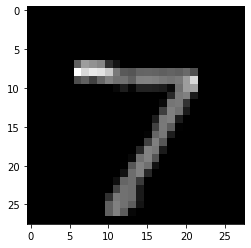

In [ ]:
# plt.imshow(cv2.resize(xtest[0],[28,28]), cmap ="binary_r")
# print(np.shape(xtest[0]))

In [ ]:
# result = cv2.matchTemplate(image_to_compare, template_image, cv2.TM_CCOEFF_NORMED)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


In [25]:
grouped = []
if len(c_collections) == 0:
    grouped.append([c_collections[0]])
else:
    for compare_1 in c_collections:
        for compare_2 in grouped:
            c1_resize = cv2.resize(compare_1, [100,100])
            c2_resize = cv2.resize(compare_2[0], [100,100])
            result = cv2.matchTemplate(c1_resize, c2_resize[0], cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            if max_val > 0.8:
                compare_2.append(compare_1)
        grouped.append([compare_1])

    

KeyboardInterrupt: 